<a href="https://colab.research.google.com/github/sriharipixel/PROJECT1/blob/main/tamilmovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (329, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MovieName       329 non-null    object 
 1   Genre           329 non-null    object 
 2   Rating          329 non-null    float64
 3   Director        329 non-null    object 
 4   Actor           329 non-null    object 
 5   PeopleVote      329 non-null    int64  
 6   Year            329 non-null    int64  
 7   Hero_Rating     329 non-null    int64  
 8   movie_rating    329 non-null    int64  
 9   content_rating  329 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 25.8+ KB
None

First 5 rows:
          MovieName   Genre  Rating              Director  \
0        Mouna Guru  Action     7.7          Santha Kumar   
1       7 Aum Arivu  Action     6.2       A.R. Murugadoss   
2  Vaagai Sooda Vaa  Comedy     8.0           A. 

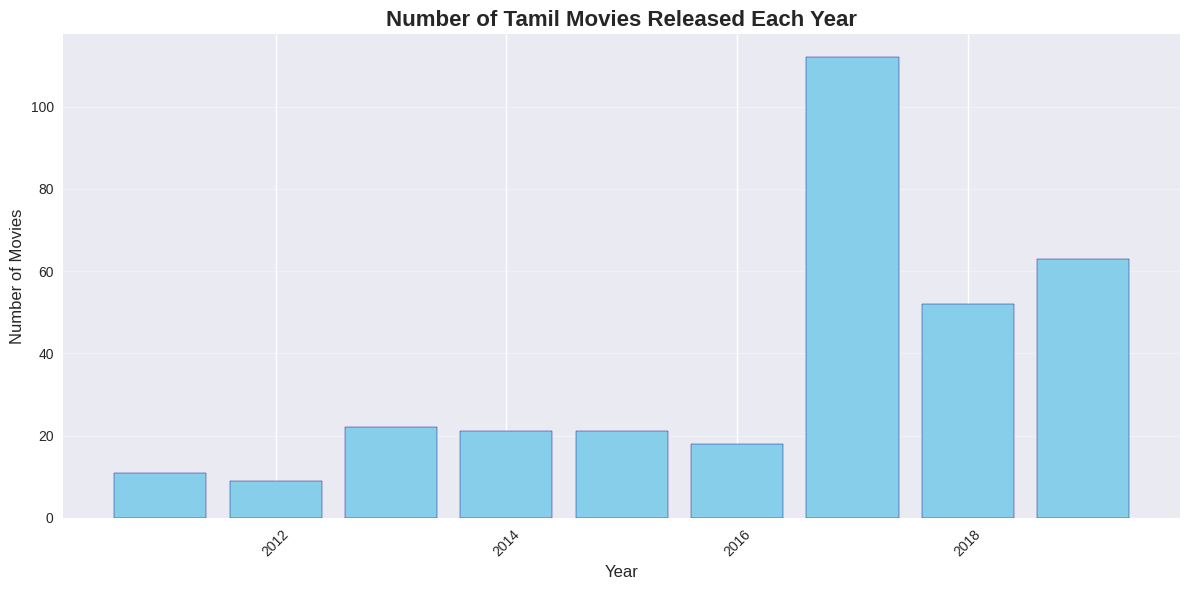

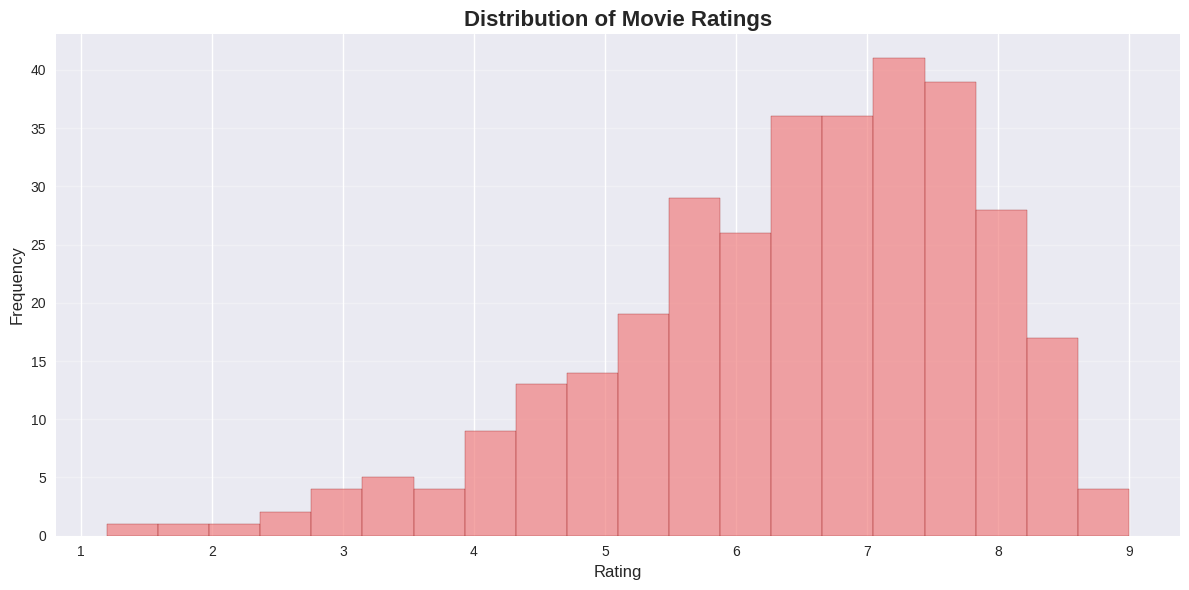

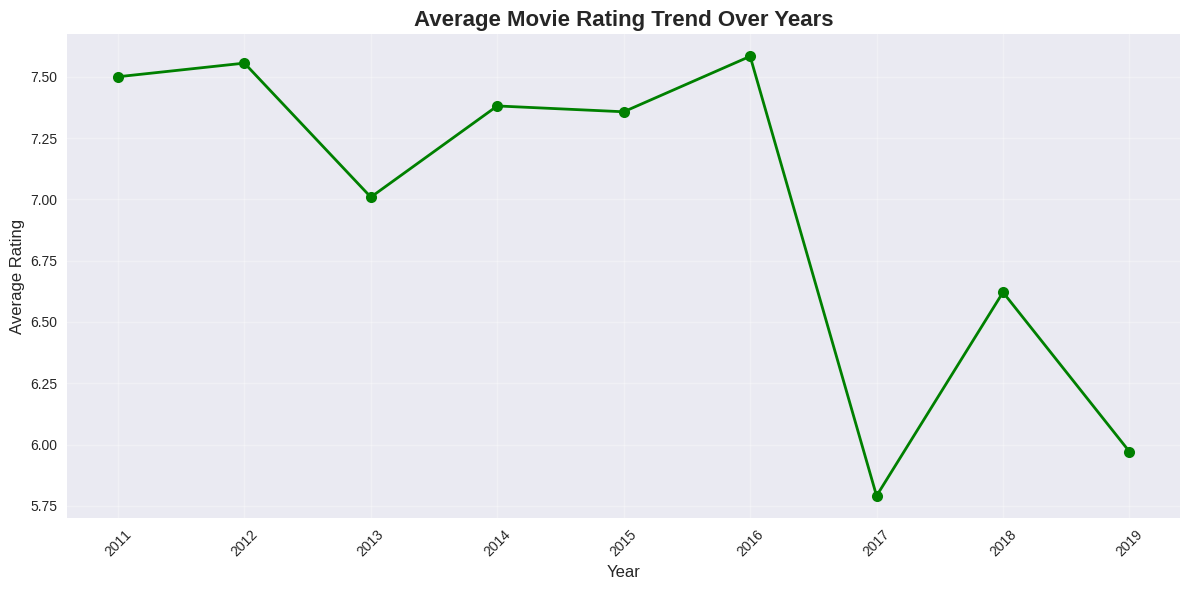

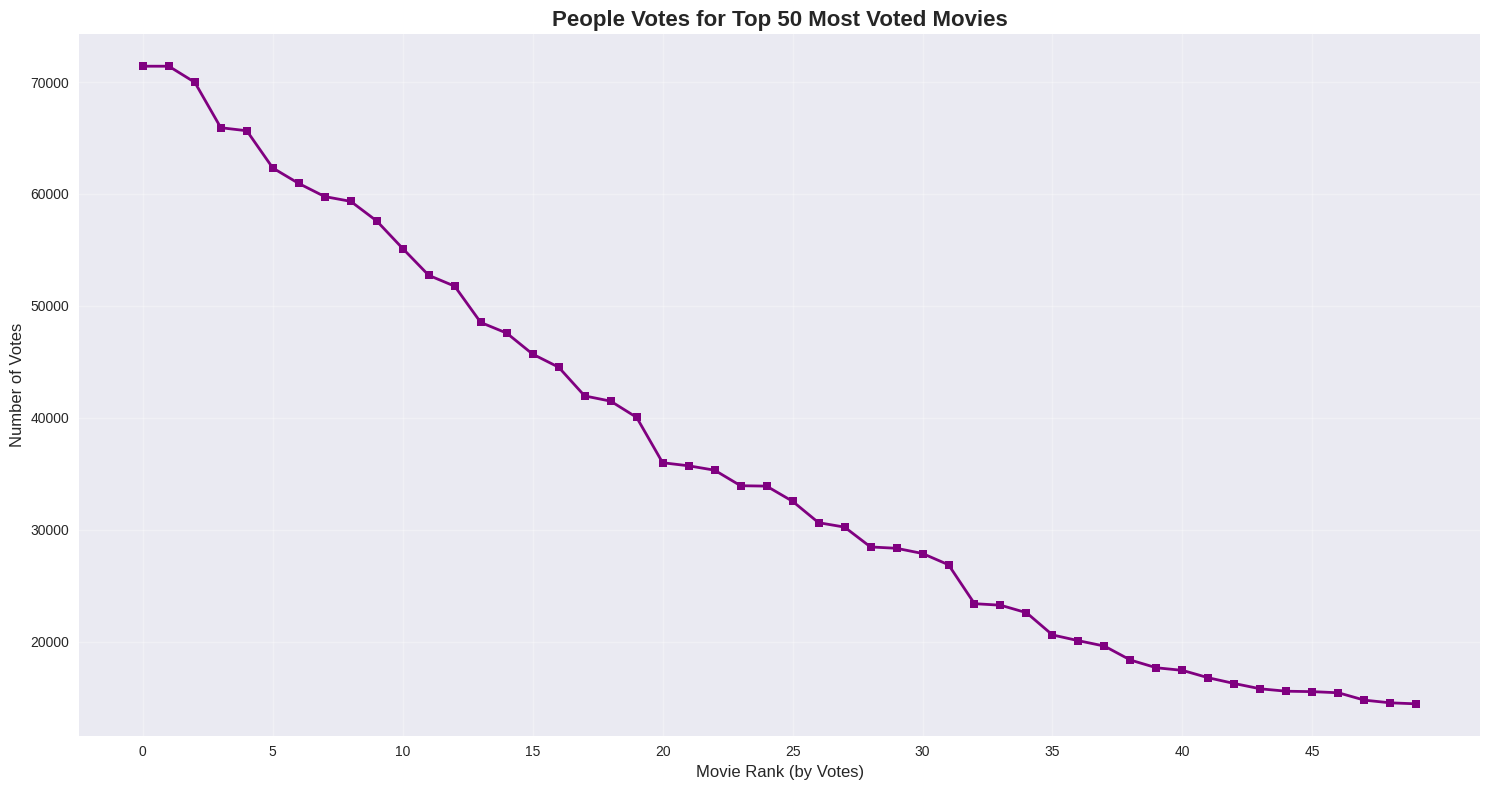

/tmp/ipython-input-2003592246.py:92: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




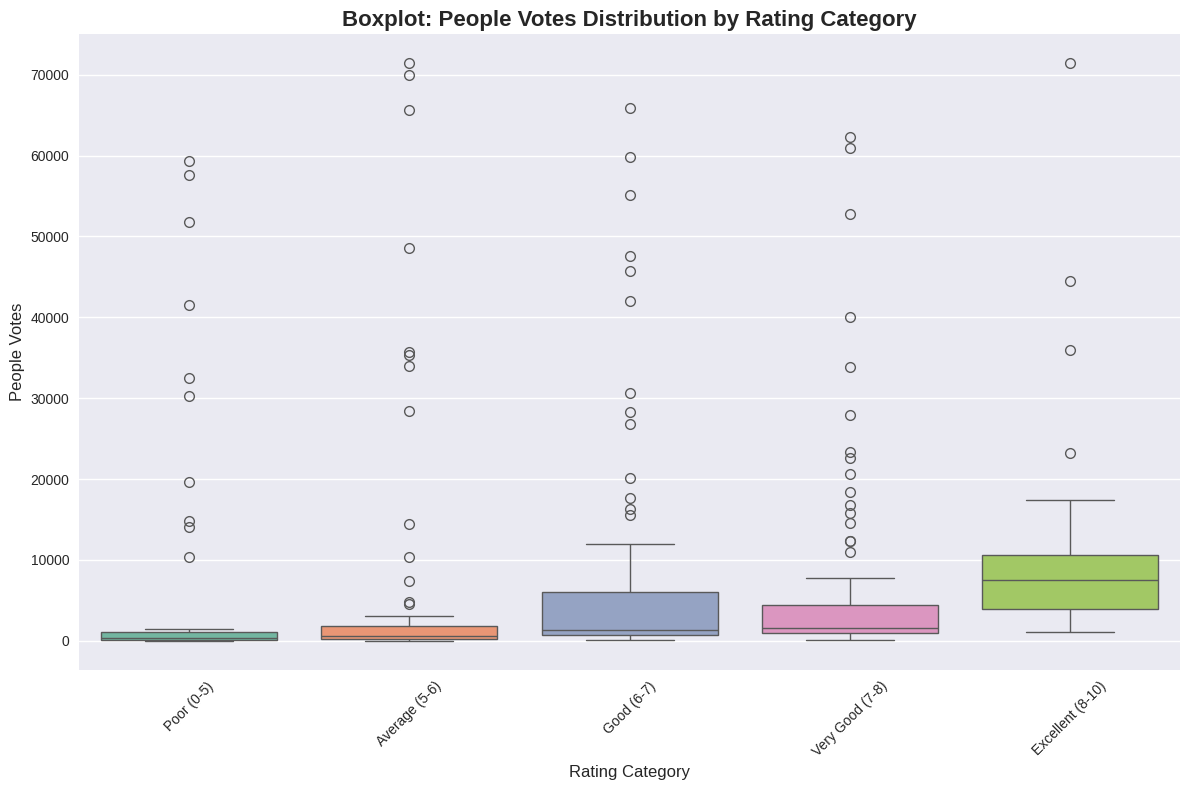

/tmp/ipython-input-2003592246.py:104: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




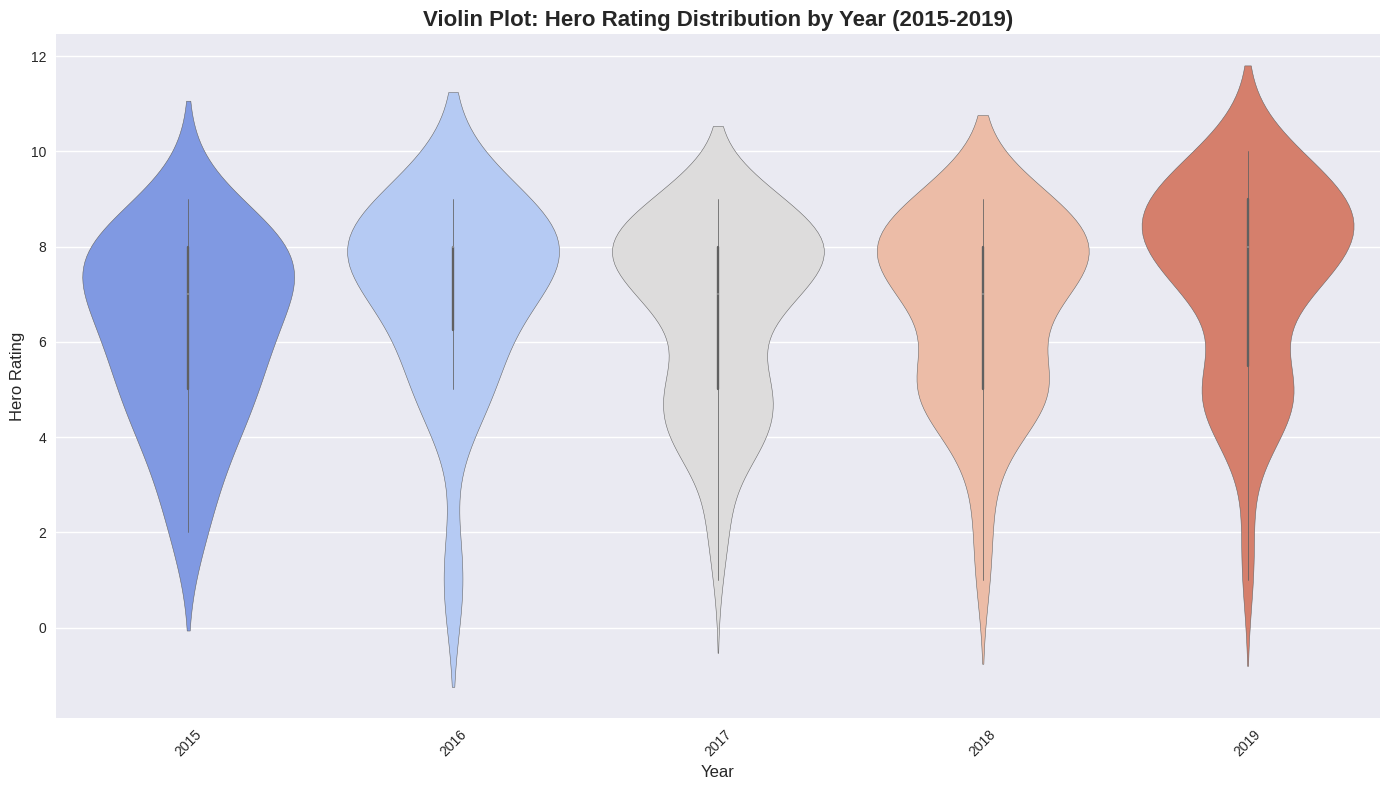

/tmp/ipython-input-2003592246.py:116: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




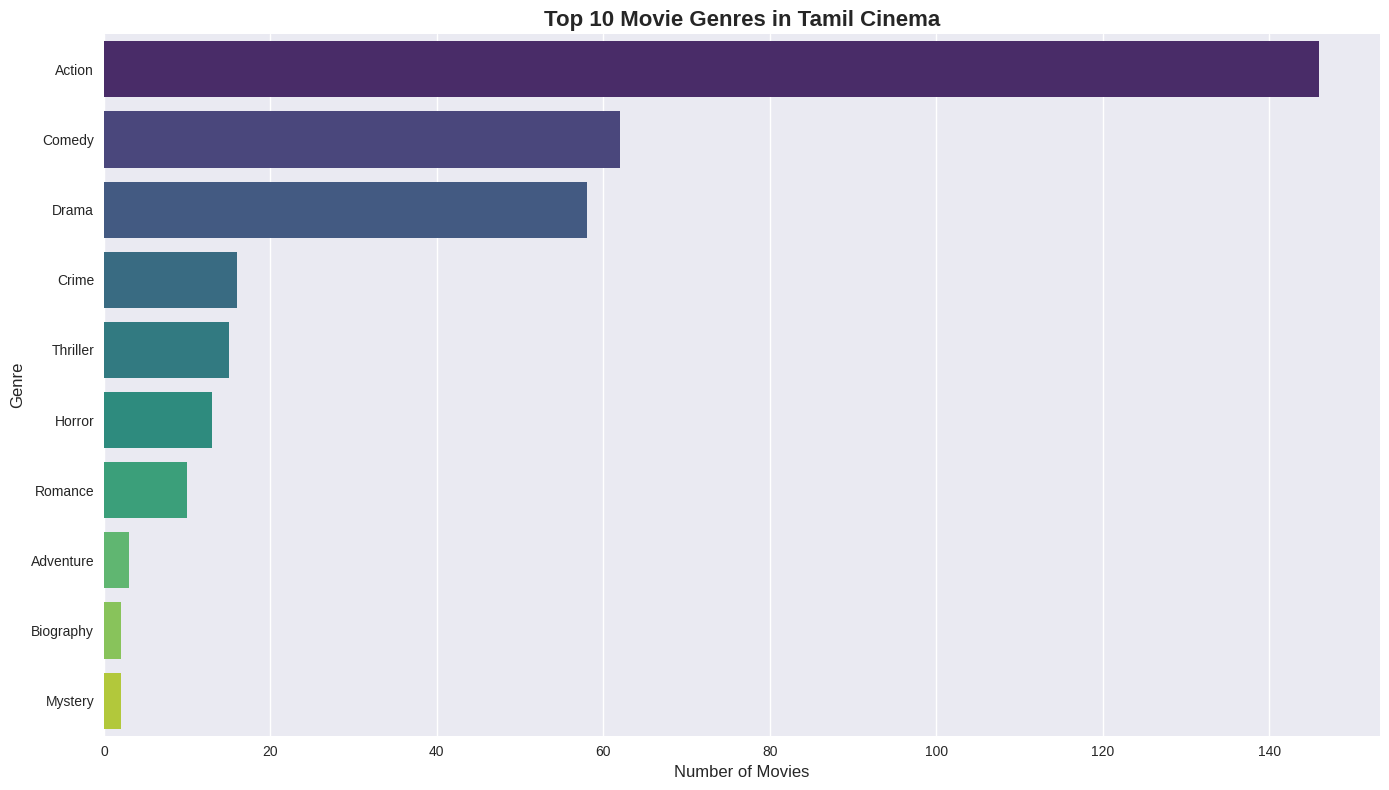

/tmp/ipython-input-2003592246.py:126: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




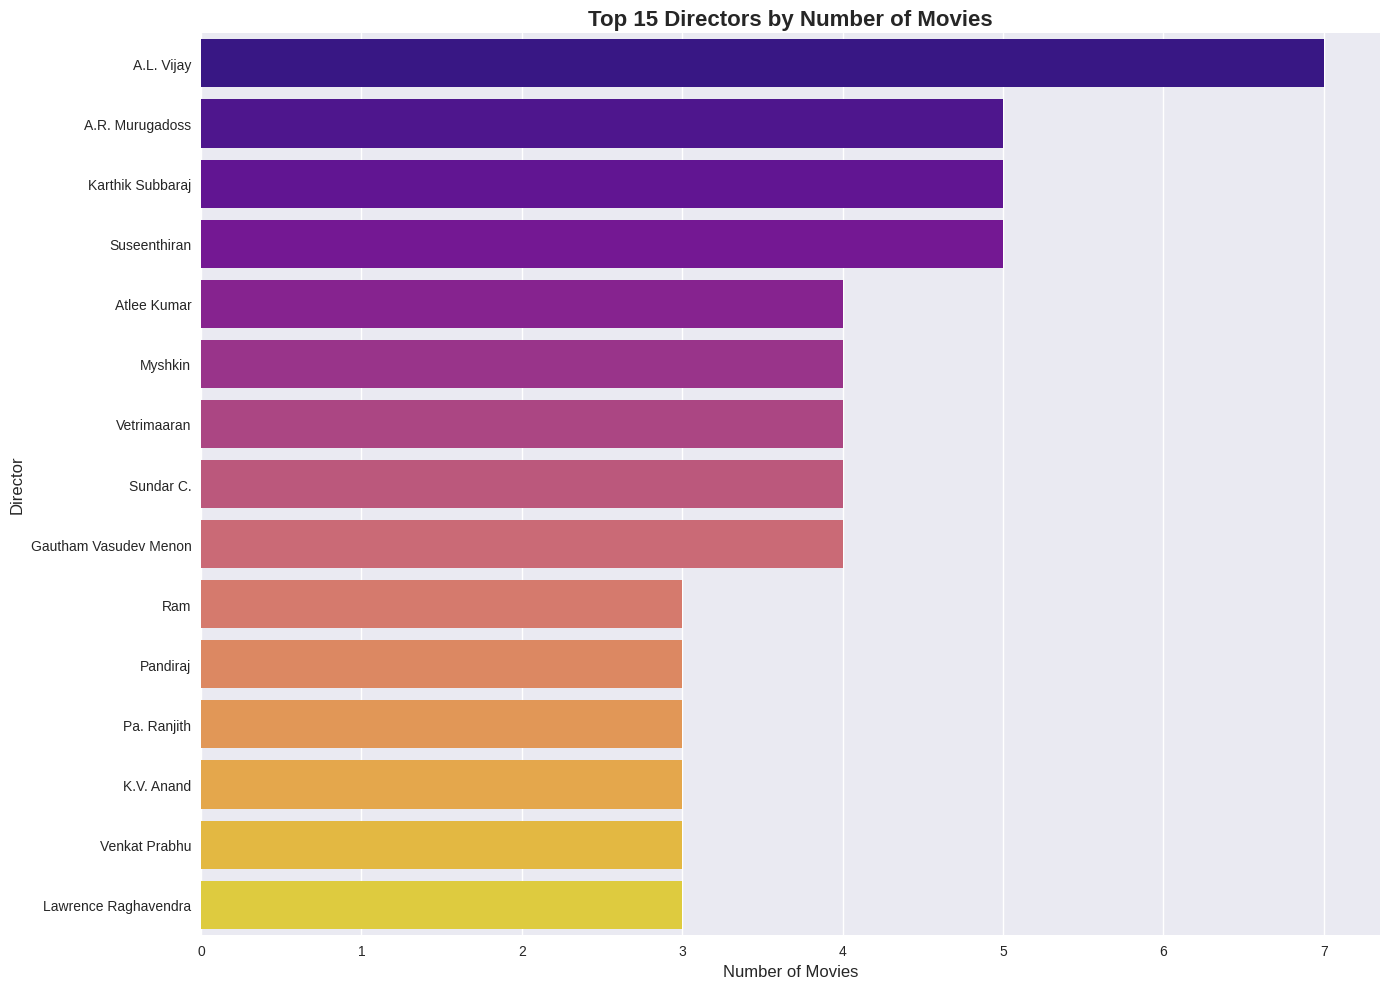

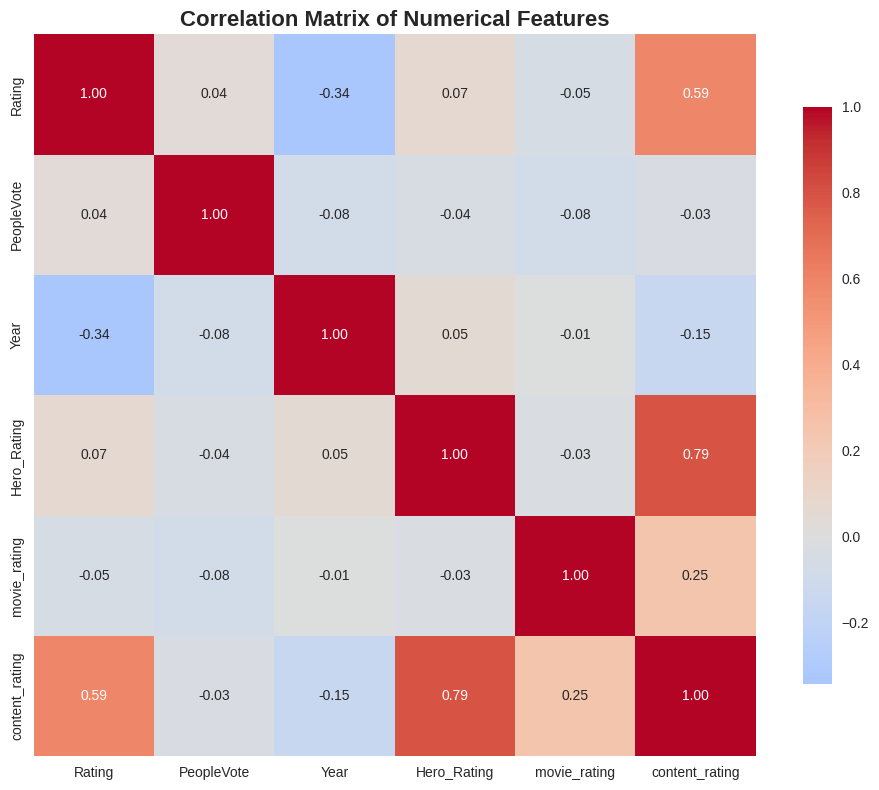

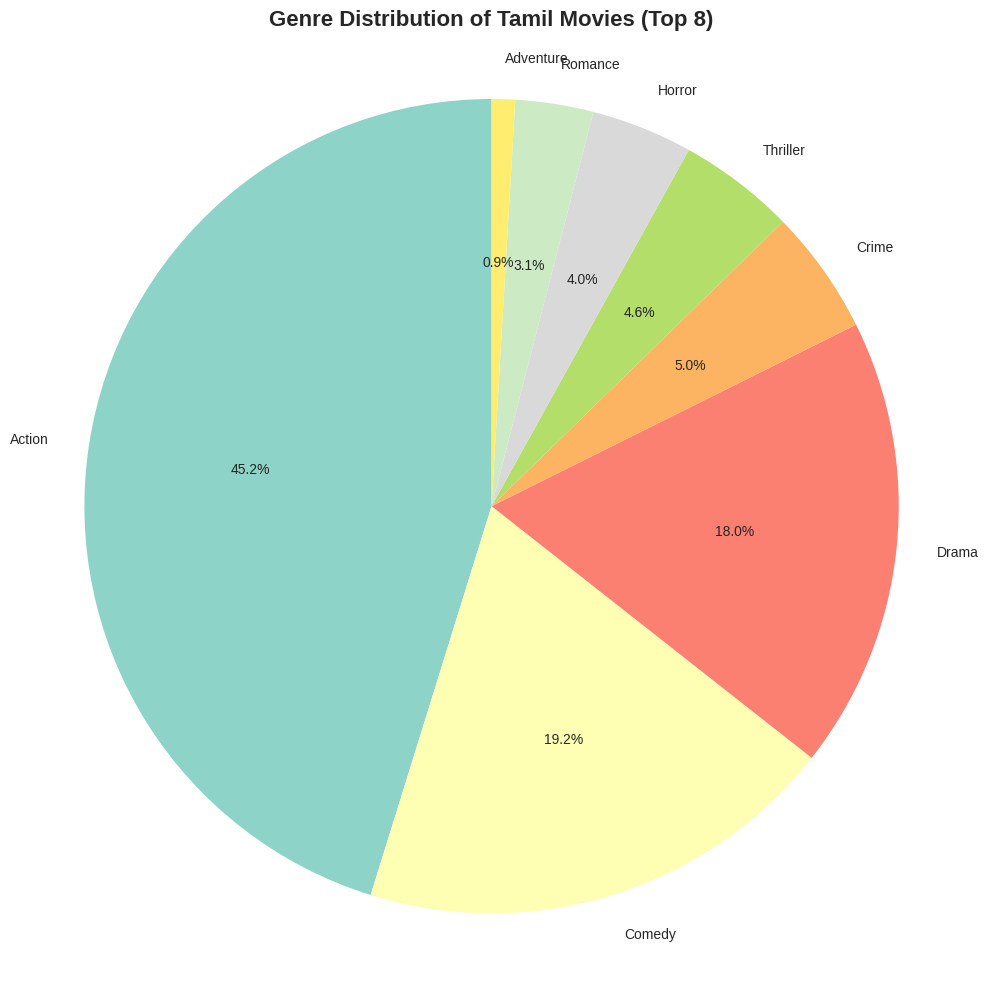

<Figure size 1400x800 with 0 Axes>

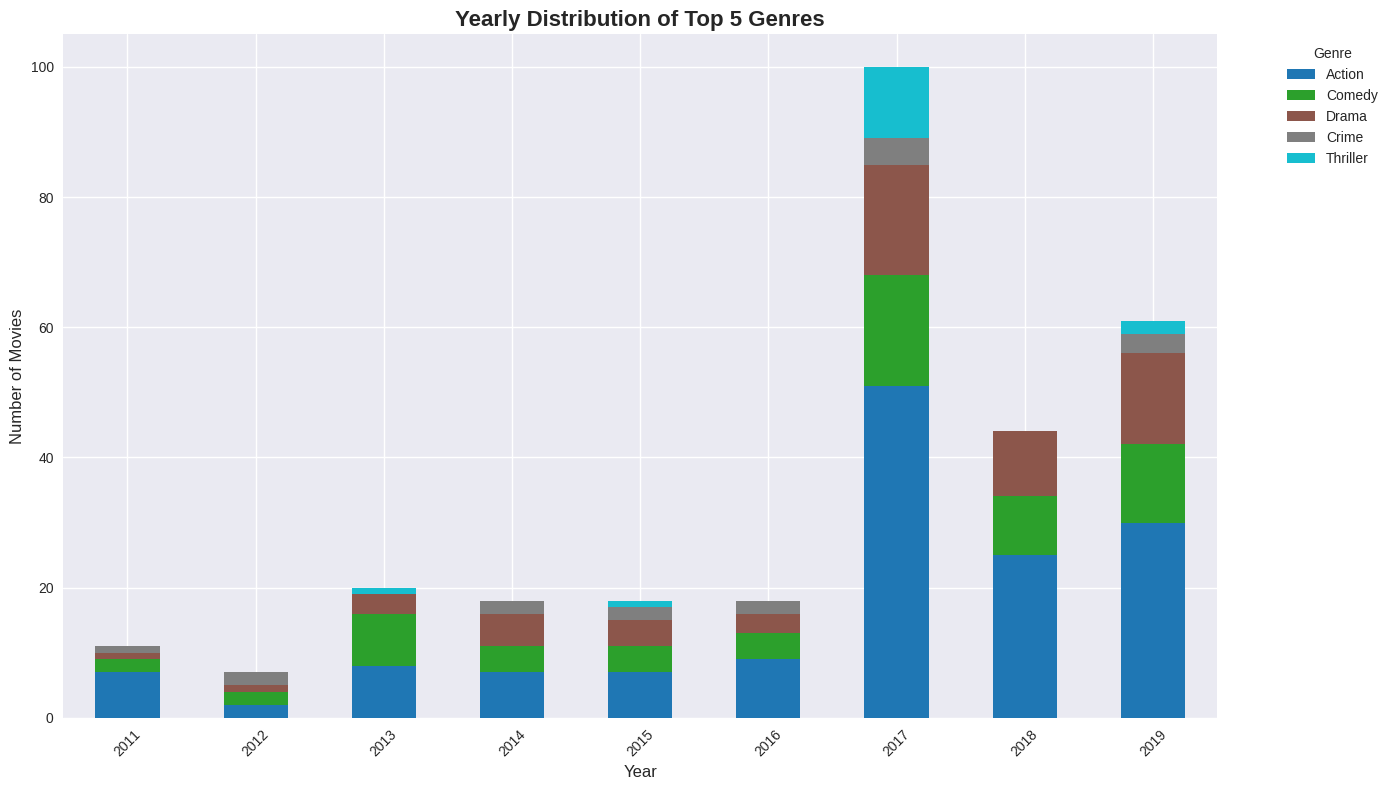


SUMMARY STATISTICS
Total Movies: 329
Time Period: 2011 - 2019
Average Rating: 6.44
Highest Rated Movie: Peranbu (9.0)
Most Voted Movie: Baahubali 2: The Conclusion (71,418 votes)
Most Prolific Director: A.L. Vijay (7 movies)
Most Active Actor: Vijay Sethupathi (15 movies)

TOP 10 HIGHEST RATED MOVIES
            MovieName  Year  Rating                  Director  Genre
              Peranbu  2018     9.0                       Ram  Drama
    Pariyerum Perumal  2018     8.8             Mari Selvaraj  Drama
         Vikram Vedha  2017     8.7                   Gayatri Action
           Raatchasan  2018     8.7                 Ram Kumar Action
                Aruvi  2017     8.6 Arun Prabhu Purushothaman  Drama
                   96  2018     8.6             C. Prem Kumar  Drama
Merku Thodarchi Malai  2018     8.6             Lenin Bharati  Drama
               Asuran  2019     8.6               Vetrimaaran Action
           Visaaranai  2015     8.5               Vetrimaaran  Crime
       

In [2]:
# Tamil Movies Data Visualization Analysis
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('/content/Tamil_movies_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nBasic Statistics:")
print(df.describe())

# Data Preprocessing
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic Data Analysis with Pandas and Matplotlib

# 1. Bar Chart - Movie Count by Year
plt.figure(figsize=(12, 6))
year_counts = df['Year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='navy')
plt.title('Number of Tamil Movies Released Each Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Histogram - Rating Distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Rating'], bins=20, color='lightcoral', edgecolor='darkred', alpha=0.7)
plt.title('Distribution of Movie Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Line Chart - Average Rating Trend Over Years
plt.figure(figsize=(12, 6))
yearly_avg_rating = df.groupby('Year')['Rating'].mean()
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values,
         marker='o', linewidth=2, markersize=8, color='green')
plt.title('Average Movie Rating Trend Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Line Chart - Top 50 Movies by People Vote (first 50)
plt.figure(figsize=(15, 8))
top_50_votes = df.nlargest(50, 'PeopleVote')[['MovieName', 'PeopleVote', 'Rating']]
plt.plot(range(50), top_50_votes['PeopleVote'].values,
         marker='s', linewidth=2, markersize=6, color='purple')
plt.title('People Votes for Top 50 Most Voted Movies', fontsize=16, fontweight='bold')
plt.xlabel('Movie Rank (by Votes)', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 50, 5))
plt.tight_layout()
plt.show()

# Seaborn: Categorical Plots

# 5. Boxplot - Rating Distribution by Content Rating
plt.figure(figsize=(12, 8))
# Create content rating categories
df['Rating_Category'] = pd.cut(df['Rating'],
                              bins=[0, 5, 6, 7, 8, 10],
                              labels=['Poor (0-5)', 'Average (5-6)', 'Good (6-7)', 'Very Good (7-8)', 'Excellent (8-10)'])

sns.boxplot(data=df, x='Rating_Category', y='PeopleVote', palette='Set2')
plt.title('Boxplot: People Votes Distribution by Rating Category', fontsize=16, fontweight='bold')
plt.xlabel('Rating Category', fontsize=12)
plt.ylabel('People Votes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Violin Plot - Hero Rating Distribution by Year
plt.figure(figsize=(14, 8))
# Select recent years for better visualization
recent_years = df[df['Year'] >= 2015]
sns.violinplot(data=recent_years, x='Year', y='Hero_Rating', palette='coolwarm')
plt.title('Violin Plot: Hero Rating Distribution by Year (2015-2019)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Hero Rating', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Count Plot - Movies by Genre
plt.figure(figsize=(14, 8))
# Get top genres
top_genres = df['Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Movie Genres in Tamil Cinema', fontsize=16, fontweight='bold')
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

# 8. Count Plot - Movies by Director (Top 15)
plt.figure(figsize=(14, 10))
top_directors = df['Director'].value_counts().head(15)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')
plt.title('Top 15 Directors by Number of Movies', fontsize=16, fontweight='bold')
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

# Interactive Visualizations with Plotly

# 9. Interactive Scatter Plot - Rating vs People Votes
fig = px.scatter(df,
                 x='Rating',
                 y='PeopleVote',
                 color='Year',
                 size='Hero_Rating',
                 hover_data=['MovieName', 'Director', 'Actor'],
                 title='Interactive Scatter Plot: Rating vs People Votes',
                 labels={'Rating': 'Movie Rating', 'PeopleVote': 'Number of Votes'},
                 color_continuous_scale='viridis')

fig.update_layout(
    width=1000,
    height=600,
    title_font_size=16,
    showlegend=True
)
fig.show()

# 10. Interactive Histogram - Movie Ratings Distribution
fig = px.histogram(df,
                   x='Rating',
                   nbins=30,
                   title='Interactive Histogram: Movie Ratings Distribution',
                   labels={'Rating': 'Movie Rating', 'count': 'Number of Movies'},
                   color_discrete_sequence=['#FF6B6B'])

fig.update_layout(
    width=1000,
    height=600,
    title_font_size=16,
    bargap=0.1,
    showlegend=False
)
fig.show()

# 11. Interactive Line Chart - Yearly Performance Metrics
yearly_stats = df.groupby('Year').agg({
    'Rating': 'mean',
    'PeopleVote': 'mean',
    'Hero_Rating': 'mean',
    'movie_rating': 'mean'
}).reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=yearly_stats['Year'], y=yearly_stats['Rating'],
                        mode='lines+markers', name='Average Rating',
                        line=dict(color='blue', width=3)))

fig.add_trace(go.Scatter(x=yearly_stats['Year'], y=yearly_stats['Hero_Rating'],
                        mode='lines+markers', name='Average Hero Rating',
                        line=dict(color='red', width=3)))

fig.add_trace(go.Scatter(x=yearly_stats['Year'], y=yearly_stats['movie_rating'],
                        mode='lines+markers', name='Average Movie Rating',
                        line=dict(color='green', width=3)))

fig.update_layout(
    title='Interactive Line Chart: Yearly Performance Metrics',
    xaxis_title='Year',
    yaxis_title='Average Rating',
    width=1000,
    height=600,
    title_font_size=16,
    showlegend=True
)
fig.show()

# 12. Interactive Box Plot - Rating Distribution by Year
fig = px.box(df,
             x='Year',
             y='Rating',
             color='Year',
             title='Interactive Box Plot: Rating Distribution by Year',
             labels={'Year': 'Release Year', 'Rating': 'Movie Rating'})

fig.update_layout(
    width=1000,
    height=600,
    title_font_size=16,
    showlegend=False
)
fig.show()

# Additional Advanced Visualizations

# 13. Heatmap - Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_columns = ['Rating', 'PeopleVote', 'Year', 'Hero_Rating', 'movie_rating', 'content_rating']
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 14. Pie Chart - Genre Distribution (Top 8)
plt.figure(figsize=(10, 10))
top_8_genres = df['Genre'].value_counts().head(8)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_8_genres)))
plt.pie(top_8_genres.values, labels=top_8_genres.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Genre Distribution of Tamil Movies (Top 8)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 15. Stacked Bar Chart - Yearly Genre Distribution
plt.figure(figsize=(14, 8))
genre_year = pd.crosstab(df['Year'], df['Genre'])
top_5_genres = genre_year.sum().nlargest(5).index
genre_year[top_5_genres].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Yearly Distribution of Top 5 Genres', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary Statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"Total Movies: {len(df)}")
print(f"Time Period: {df['Year'].min()} - {df['Year'].max()}")
print(f"Average Rating: {df['Rating'].mean():.2f}")
print(f"Highest Rated Movie: {df.loc[df['Rating'].idxmax(), 'MovieName']} ({df['Rating'].max()})")
print(f"Most Voted Movie: {df.loc[df['PeopleVote'].idxmax(), 'MovieName']} ({df['PeopleVote'].max():,} votes)")
print(f"Most Prolific Director: {df['Director'].value_counts().index[0]} ({df['Director'].value_counts().iloc[0]} movies)")
print(f"Most Active Actor: {df['Actor'].value_counts().index[0]} ({df['Actor'].value_counts().iloc[0]} movies)")

# Top 10 Highest Rated Movies
print("\n" + "="*50)
print("TOP 10 HIGHEST RATED MOVIES")
print("="*50)
top_10_rated = df.nlargest(10, 'Rating')[['MovieName', 'Year', 'Rating', 'Director', 'Genre']]
print(top_10_rated.to_string(index=False))